# Mushroom Classification using various Machine Learning Algorithms


In [37]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import graphviz
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.naive_bayes import GaussianNB

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# read the data rom a csv file
df = pd.read_csv('datasets/mushrooms.csv')

'''
# uncomment the following code to download the dataset from the internet
dset = ''
url = ''
# check if the datset exists and if it does not, download the dataset from the internet
if not os.path.exists(dset):
    df = pd.read_csv(url)
'''

"\n# uncomment the following code to download the dataset from the internet\ndset = ''\nurl = ''\n# check if the datset exists and if it does not, download the dataset from the internet\nif not os.path.exists(dset):\n    df = pd.read_csv(url)\n"

     Attribute Information: (classes: edible=e, poisonous=p)

     cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

     cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

     cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

     bruises: bruises=t,no=f

     odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

     gill-attachment: attached=a,descending=d,free=f,notched=n

     gill-spacing: close=c,crowded=w,distant=d

     gill-size: broad=b,narrow=n

     gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

     stalk-shape: enlarging=e,tapering=t

     stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

     stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

     stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

     stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

     stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

     veil-type: partial=p,universal=u

     veil-color: brown=n,orange=o,white=w,yellow=y

     ring-number: none=n,one=o,two=t

     ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

     spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

     population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

     habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [7]:
# look for the concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

    From the following visualization, we see that there are 8124 rows and 23 columns

In [8]:
# check the statistics of the columns
df.describe()

# 'count' shows the number of non-null values in each column
# 'unique' shows the number of unique values in each column
# 'top' shows the most common value in each column
# 'freq' shows the frequency of the most common value in each column

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
# Unique occurences of 'class' column
df['class'].unique()

# we see there are two unique values in the 'class' column. They are p and e. p stands for poisonuous
# and e stands for edible.

# we will count the number of occurences of each value in the 'class' column
df['class'].value_counts()

# we see there are 4208 edible mushrooms and 3916 poisonuous mushrooms in the dataset.

e    4208
p    3916
Name: class, dtype: int64

    Let's visualize the count of edible and poisonous mushrooms using a bar chart from Seaborn library

    We see that there are 4208 edible mushrooms and 3916 poisonous mushrooms.

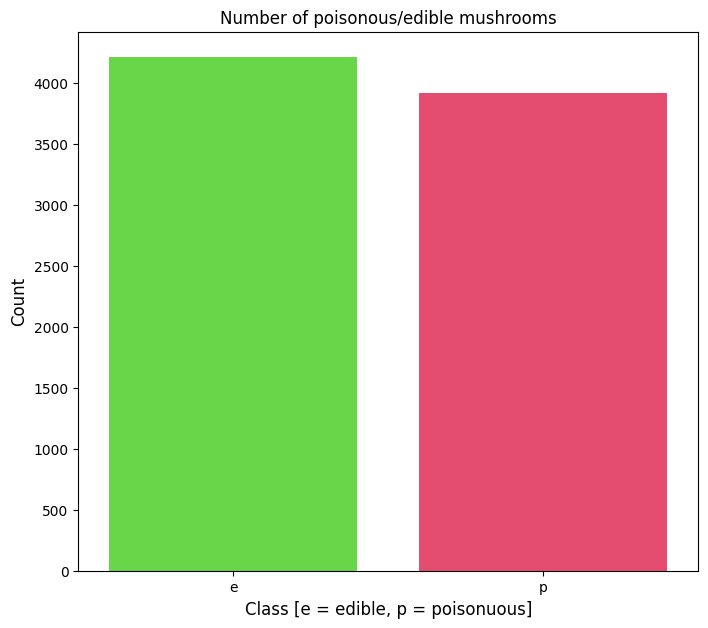

In [10]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x = count.index, y = count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class [e = edible, p = poisonuous]', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.savefig("opimages/mushrooms1.png", format='png', dpi=500)
plt.show()

    # Data manipulation
    We see the data is categorical. We need to convert it to numerical data. We will use LabelEncoder from sklearn.preprocessing to convert the data to numerical data.

    This approach requires the category to be ordinal. However, the data is not ordinal. For example, the cap-shape is not ordinal. It is not true that bell is less than conical. So, we will use OneHotEncoder from sklearn.preprocessing to convert the data to numerical data.

In [11]:
# we will convert the ordinal data to categorical data
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [12]:
# use LabelEncoder to convert the categorical data to ordinal data
le = LabelEncoder()
df = df.apply(le.fit_transform)

In [13]:
# recheck the head of the data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
# check the column with all-zero datasets and drop them
df = df.loc[:, (df != 0).any(axis=0)]

# check the shape of the data
df.shape

# we see a cloumn has been dropped. that is the veil-type column and it has only one value 0.

(8124, 22)

In [15]:
df['gill-color'].unique()

array([ 4,  5,  2,  7, 10,  3,  9,  1,  0,  8, 11,  6])

    We will use Violin-plot to visualize the distribution of the data.

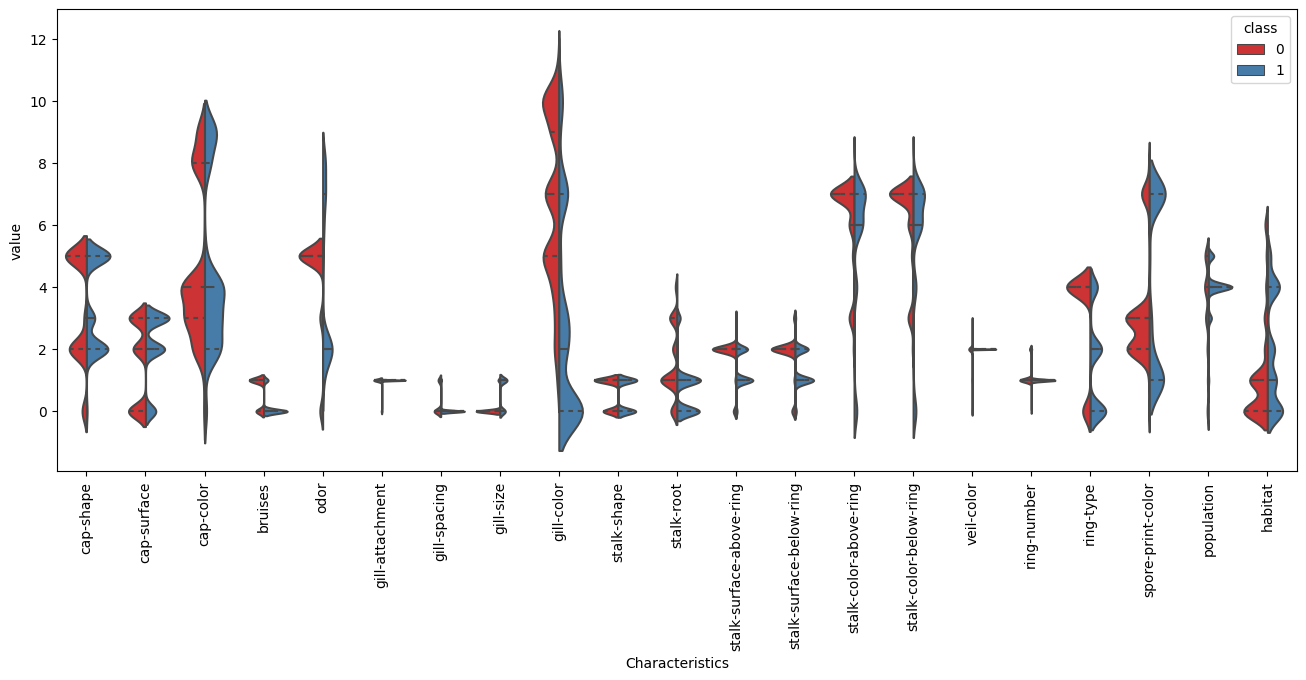

In [16]:
df_div = pd.melt(df, 'class', var_name='Characteristics')
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x='Characteristics', y='value', hue='class', split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(['class'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
plt.savefig('opimages/violinplot.png', format='png', dpi=1000, bbox_inches='tight')

    We will look at the co-relation of the data.

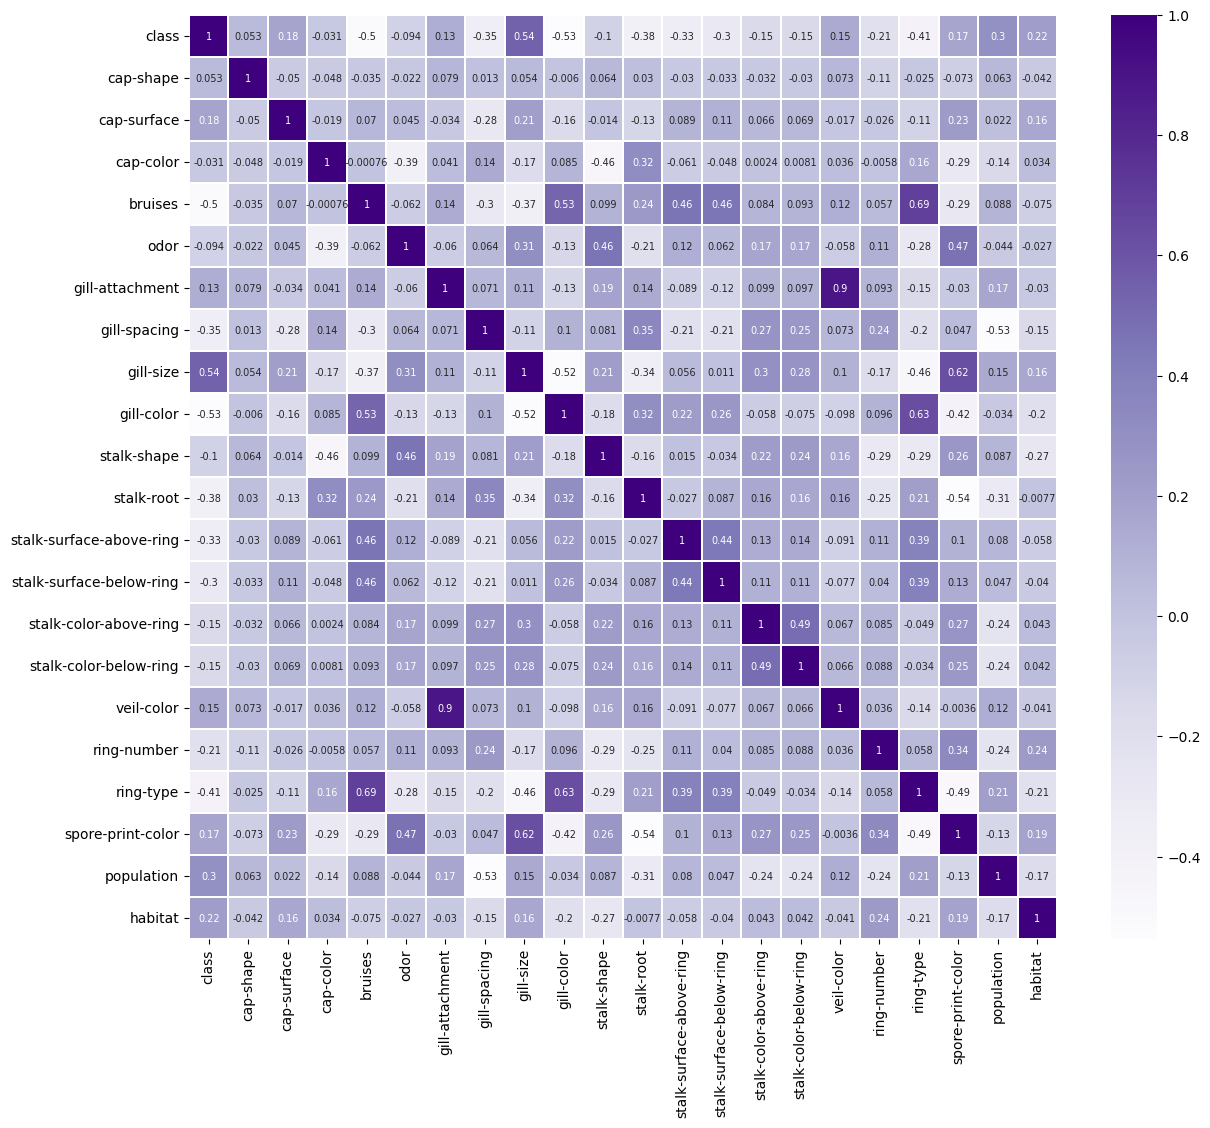

In [17]:
# we willcreate a heatmap of the data

plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})

plt.yticks(rotation=0)

# save the image in the output folder
plt.savefig('opimages/heatmap.png', format='png', dpi=1000, bbox_inches='tight')

Usually, the least correlating variable is the most important one for classification.
In this case, "gill-color" is -0.53, so lets take a look at it closely.

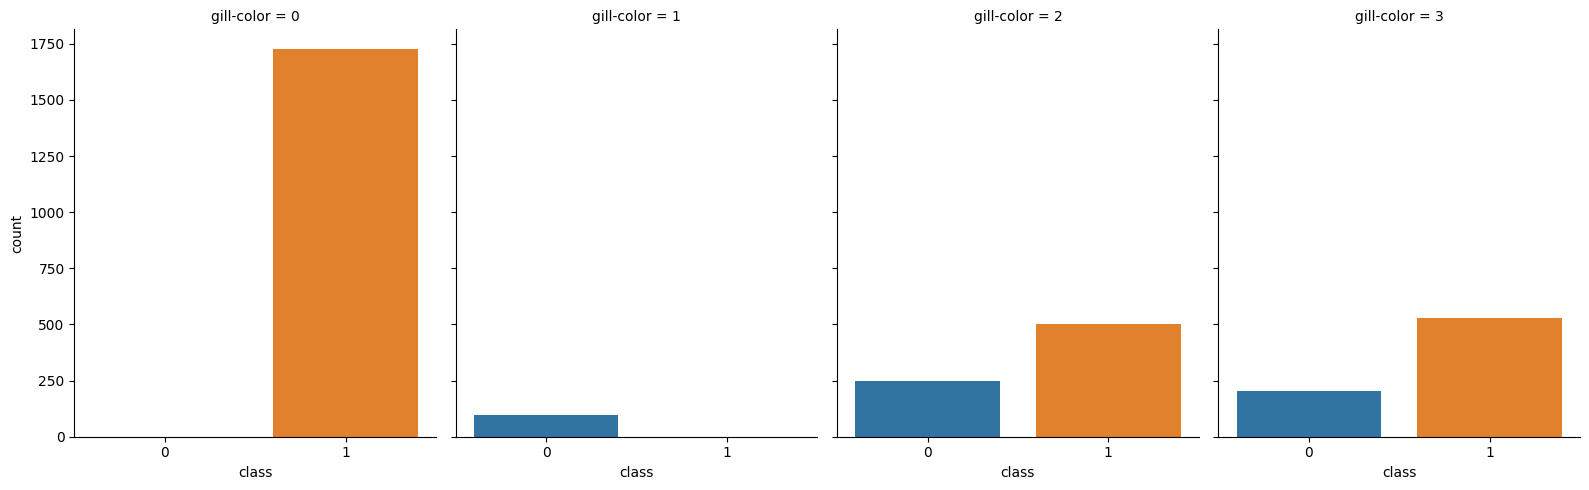

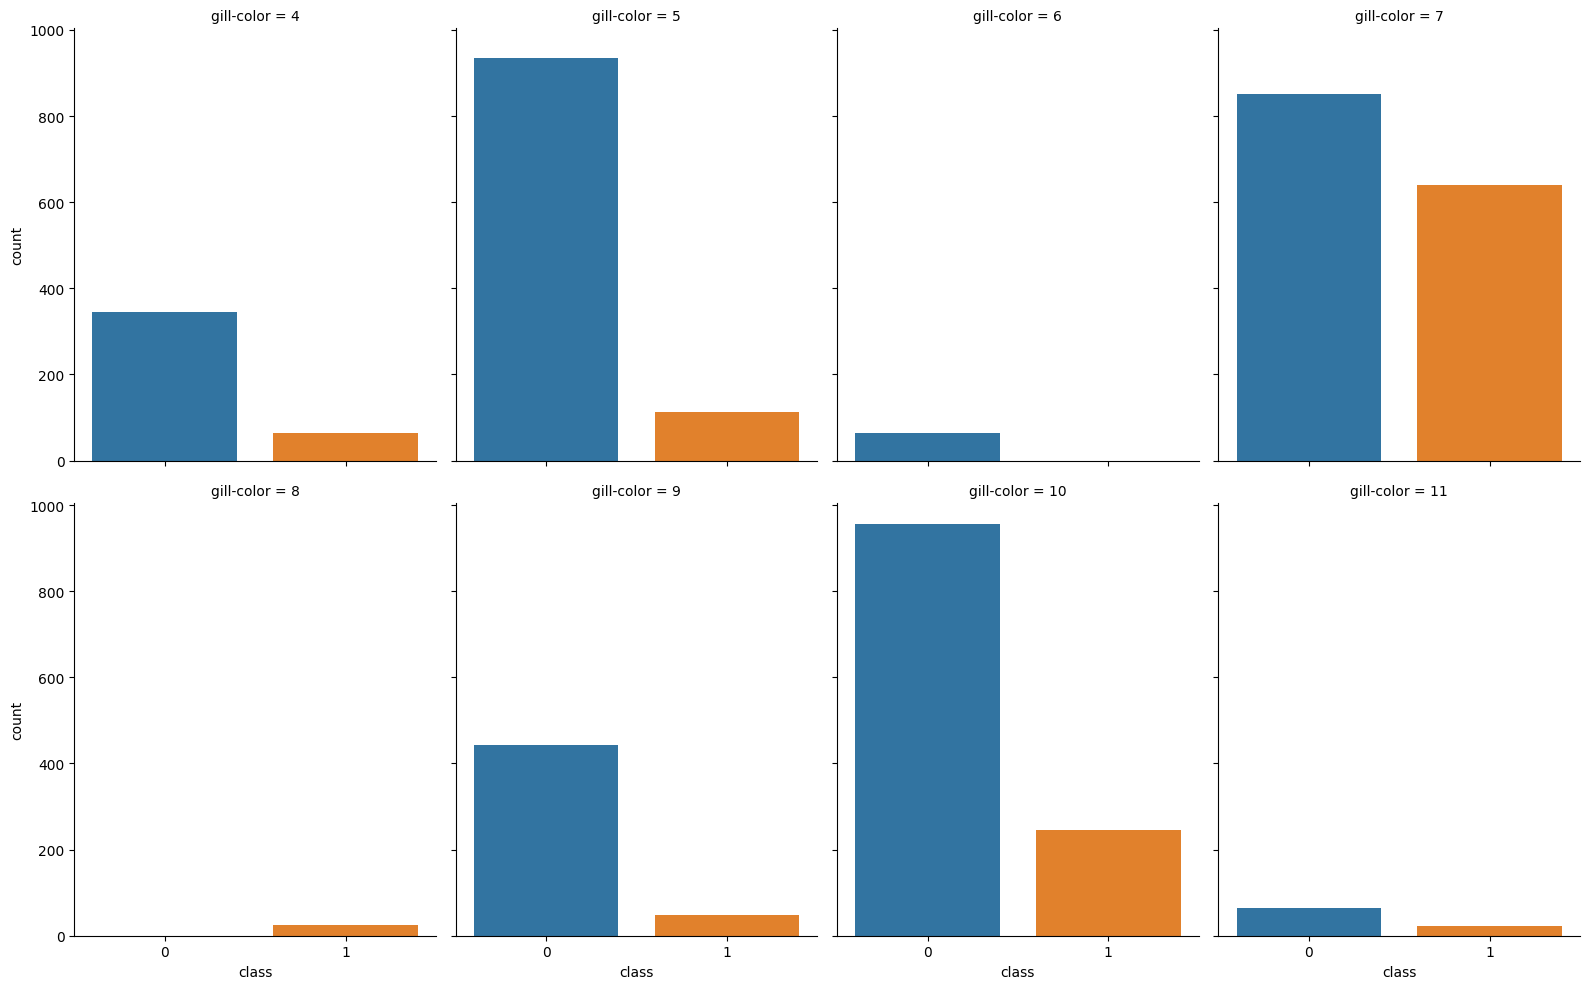

In [68]:
# Create a factor-plot of the data

# Factor plot of the data for 'gill-color' column which is less than 3.5
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.catplot(x = 'class', col='gill-color', data=new_var, kind='count', aspect=.8, col_wrap=4);
plt.savefig("opimages/gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

# Factor plot of the data for 'gill-color' column which is greater than 3.5
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']>3.5]
sns.catplot(x = 'class', col='gill-color', data=new_var, kind='count', aspect=.8, col_wrap=4);
plt.savefig("opimages/gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

In [73]:
# get a closer look at gill-color
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

# from this result we will see whether a crtain gill-color is edible or poisonuous.
# Values equal to 0 are edible and values equal to 1 are poisonuous.

,gill-color,class
0,0,1.00
8,8,1.00
3,3,0.72
2,2,0.67
7,7,0.43
11,11,0.26
10,10,0.20
4,4,0.16
5,5,0.11
9,9,0.10


    We will be preparing the data and splitting it into training and testing data.

    Since we will be predicting the class, we will be dropping the class column from the data.

In [20]:
# drop class column from the data
X = df.drop(['class'], axis=1)

# assign the class column to y
y = df['class']

# perform PCA to reduce dimensions of dats
from sklearn.decomposition import PCA
pca = PCA(n_components = 7, svd_solver = 'full', whiten = True)
pcaft = pca.fit_transform(X)

# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(pcaft, y, test_size=0.5, random_state=123)

    Using lazypredict to find the best model

In [21]:
# check scores of Classification models

# import lazypredict library 
from lazypredict.Supervised import LazyClassifier

# define the lazypredict classifier with the parameters
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

## save the model with resetted index
models = models.reset_index()

# print the models and their scores
print(models)

100%|██████████| 29/29 [00:08<00:00,  3.47it/s]

                            Model  Accuracy  Balanced Accuracy  ROC AUC  \
0                LabelPropagation      1.00               1.00     1.00   
1                  LabelSpreading      1.00               1.00     1.00   
2            ExtraTreesClassifier      0.99               0.99     0.99   
3                  LGBMClassifier      0.99               0.99     0.99   
4                   XGBClassifier      0.99               0.99     0.99   
5          RandomForestClassifier      0.99               0.99     0.99   
6               BaggingClassifier      0.98               0.98     0.98   
7            KNeighborsClassifier      0.98               0.98     0.98   
8          DecisionTreeClassifier      0.97               0.97     0.97   
9             ExtraTreeClassifier      0.96               0.96     0.96   
10                            SVC      0.96               0.96     0.96   
11                          NuSVC      0.90               0.90     0.90   
12             AdaBoostCl

# ROC Curve

### ROC curve for five most common models, those are Random Forest, KNN, Decison Tree, Gaussian Naive Base and Logistic Regression

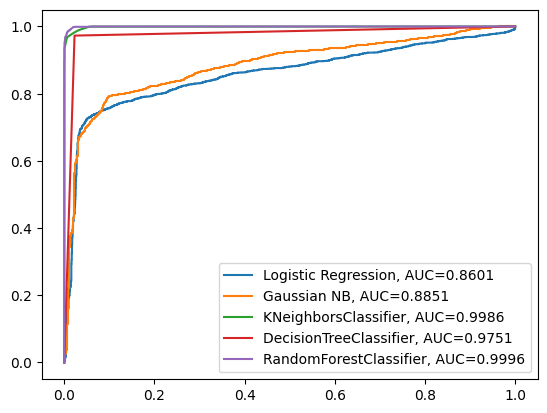

In [74]:
## Find ROC Curve
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gaussian NB, AUC="+str(auc))

#fit KNeighborsClassifier model and plot ROC curve
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc))

#fit DecisionTreeClassifier model and plot ROC curve
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="DecisionTreeClassifier, AUC="+str(auc))

#fit RandomForestClassifier model and plot ROC curve
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RandomForestClassifier, AUC="+str(auc))

#add legend
plt.legend()

In [23]:
# create  function to check the accuracy of agiven array and return the accuracy in percentage

def check_accuracy(y_test, y_pred):
    correct = 0
    for i in range(0, len(y_test)):
        if y_test[i-1] == y_pred[i-1]:
            correct += 1
    return round((correct/len(y_test))*100, 3)


In [24]:
# implement Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, bootstrap=True)
rf.fit(pcaft, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [25]:
# print accuracy of the model
print(f"Test Accuracy: {round(rf.score(X_test, y_test)*100, 3)}%")

Test Accuracy: 100.0%


In [26]:
# predict the dataset
preds = rf.predict(X_test)
print(f"The accuracy of the prdicted dataset with the actual dataset is {check_accuracy(preds, y_test.values)}%")

The accuracy of the prdicted dataset with the actual dataset is 100.0%


    We can see that the predicted value and the true value matches 100%.

In [27]:
## import joblib
import joblib as jl

In [28]:
## dump joblib
jl.dump(rf, "Mushroom_Prediction")

['Mushroom_Prediction']

In [29]:
jmodel = jl.load("Mushroom_Prediction")

In [30]:
p = jmodel.predict(pca.transform(([[5,2,4,1,6,1,0,1,4,0,3,2,2,7,0,2,1,4,2,3,5]])))

In [31]:
if p[0] == 1:
    print("Poisonuous")
else: print("Edible")

Poisonuous


## GUI

In [32]:
from tkinter import *

In [33]:
def show_entry_fields():
    
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get()) 
    p10=int(e10.get())
    p11=int(e11.get())
    
    p12=int(e12.get())
    p13=int(e13.get())
    p14=int(e14.get())
    p15=int(e15.get())
    p16=int(e16.get())
    p17=int(e17.get())
    p18=int(e18.get())
    p19=int(e19.get())
    p20=int(e20.get())
    p21=int(e21.get())
    p22=int(e22.get())
    
    model = jl.load('Mushroom_Prediction')
    result=model.predict(pca.transform([[p1,p2,p3,p4,p5,p6,
                           p7,p8,p9,p10,p11,p12,p13,p14,
                            p15,p16,p17,p18,p19,p20,p21]]))
    
    if result[0] == 0:
        Label(master, text="Edible").grid(row=31)
    else:
        Label(master, text="Poisonous").grid(row=31)
    
    
master = Tk()
master.title("Mushroom Classification Using Machine Learning")
label = Label(master, text = "Mushroom Classification Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master,text="cap-shape :(cap-shape: bell=0,conical=1,convex=5,flat=2, knobbed=3,sunken=4)").grid(row=1)
Label(master, text="cap-surface:(fibrous=0,grooves=1,scaly=3,smooth=2)").grid(row=2)
Label(master, text="cap-color:(brown=4,buff=0,cinnamon=1,gray=3,green=r, \
pink=5,purple=6,red=2,white=7,yellow=8)").grid(row=3)
Label(master, text="bruises:(bruises=1,no=0)").grid(row=4)
Label(master, text="odor:(almond=0,anise=3,creosote=1,fishy=8,foul=2,\
musty=4,none=5,pungent=6,spicy=7 \
)").grid(row=5)
Label(master, text="gill-attachment:(attached=0,descending=1,free=2,notched=3)").grid(row=6)
Label(master, text="gill-spacing:(close=0,crowded=2,distant=1 \
)").grid(row=7)
Label(master, text="gill-size:(road=0,narrow=1)").grid(row=8)
Label(master, text="gill-color:(black=4,brown=5,buff=0,chocolate=3,gray=2,green=8,orange=6,pink=7,purple=9,red=1,white=10,yellow=11)").grid(row=9)
Label(master, text="stalk-shape:(enlarging=0,tapering=1)").grid(row=10)
Label(master,text="stalk-root:( bulbous=0,club=1,cup=5,equal=2,rhizomorphs=4, \
rooted=3,missing=6)").grid(row=11)

Label(master,text="stalk-surface-above-ring:(fibrous=0,scaly=3,silky=1,smooth=2)").grid(row=12)
Label(master,text="stalk-surface-below-ring:(fibrous=0,scaly=3,silky=1,smooth=2 \
)").grid(row=13)
Label(master,text="stalk-color-above-ring:(brown=4,buff=0,cinnamon=1,gray=3, \
orange=5,pink=6,red=2,white=7,yellow=8)").grid(row=14)
Label(master,text="stalk-color-below-ring:(brown=4,buff=0,cinnamon=1,gray=3, \
orange=5,pink=6,red=2,white=7,yellow=8)").grid(row=15)
Label(master,text="veil-type:(partial=0,universal=1)").grid(row=16)
Label(master,text="veil-color:(brown=0,orange=1,white=2,yellow=3)").grid(row=17)
Label(master,text="ring-number:(none=0,one=1,two=2)").grid(row=18)
Label(master,text="ring-type:(cobwebby=0,evanescent=1,flaring=2,large=3,\
none=4,pendant=5,sheathing=6,zone=7)").grid(row=19)
Label(master,text="spore-print-color:(black=2,brown=3,buff=0,chocolate=1, \
green=5,orange=4,purple=6,white=7,yellow=8 \
)").grid(row=20)
Label(master,text="population:(abundant=0,clustered=1,numerous=2,scattered=3, \
# several=4,solitary=5)").grid(row=21)
Label(master,text="habitat:(grasses=1,leaves=2,meadows=3,paths=4,urban=5,\
# waste=6,woods=0)").grid(row=22)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18 = Entry(master)
e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

e12.grid(row=12,column=1)
e13.grid(row=13,column=1)
e14.grid(row=14,column=1)
e15.grid(row=15,column=1)
e16.grid(row=16,column=1)
e17.grid(row=17,column=1)
e18.grid(row=18,column=1)
e19.grid(row=19,column=1)
e20.grid(row=20,column=1)
e21.grid(row=21,column=1)
e22.grid(row=22,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()